## Práctica en clase (k medias)

Una cadena de tiendas de accesorios masculinos entrevistaron a 180 clientes y se les pidió que, en una escala de 5 niveles ((1: nada importante, 5: muy importante), evaluaran la importancia de los siguientes aspectos al momento de comprar productos:
- Tiempo: ahorro de tiempo.
- Ofertas: conseguir ofertas.
- Exclusivo: obtener productos que no están en otras tiendas.
- Novedad: probar cosas nuevas.
- Conocimiento: conocer lo que la tienda tiene para ofrecer.

Realiza los siguientes pasos
1. Carga las librerías y los datos
2. Obtén la estadística descriptica de cada variable
3. Elimina variables altamente correlacionadas (r > 0.90).
4. Estandariza las variables
5. Realiza un análisis de conglomerados mediante el método de k medias
6. Describe cada segmento con base en los valores de los centroides

In [1]:
# Con Windows para limitar el uso de núcleos del procesador
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
df = pd.read_excel('data/b13_actitudes-compra.xlsx')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tiempo,116.0,2.818966,0.829868,1.0,2.0,3.0,3.00,5.0
ofertas,116.0,3.715517,1.069791,1.0,3.0,4.0,5.00,5.0
exclusivo,116.0,3.318966,1.051700,1.0,3.0,3.0,4.00,5.0
novedad,116.0,4.008621,0.818224,1.0,4.0,4.0,5.00,5.0
conocimiento,116.0,4.137931,0.756382,2.0,4.0,4.0,5.00,5.0
ingreso,116.0,1610.784483,758.847293,380.0,1037.5,1475.0,2054.75,3668.0


In [4]:
from scipy.stats import pearsonr

In [5]:
# Obtén la matriz de correlaciones
matriz_corr = df.corr(numeric_only = True)

<Axes: >

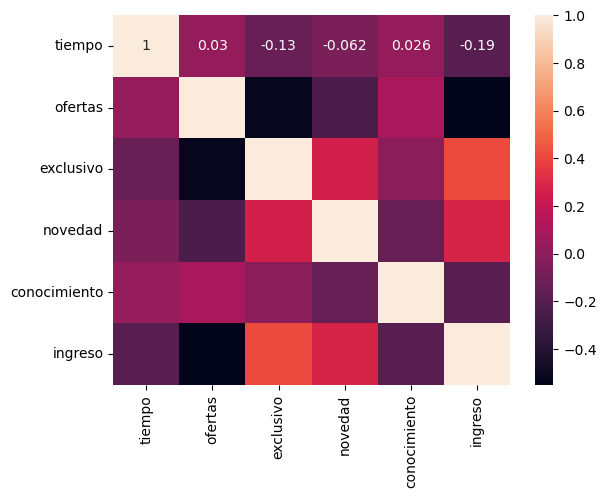

In [6]:
sns.heatmap(matriz_corr, annot = True)

In [15]:
matriz_corr

,tiempo,ofertas,exclusivo,novedad,conocimiento,ingreso
tiempo,1.000000,0.029638,-0.132529,-0.061713,0.026273,-0.190727
ofertas,0.029638,1.000000,-0.529222,-0.235594,0.091900,-0.550388
exclusivo,-0.132529,-0.529222,1.000000,0.249403,-0.001131,0.415040
novedad,-0.061713,-0.235594,0.249403,1.000000,-0.142442,0.275056
conocimiento,0.026273,0.091900,-0.001131,-0.142442,1.000000,-0.190441
ingreso,-0.190727,-0.550388,0.415040,0.275056,-0.190441,1.000000


In [16]:
X = df[['tiempo','exclusivo', 'novedad', 'conocimiento','ingreso']]

In [17]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [21]:
from sklearn.cluster import KMeans

In [22]:
# Crear instancia
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
# Ajustar modelo
model = kmeans.fit(X_std)

In [23]:
cluster = model.labels_
centroids = model.cluster_centers_

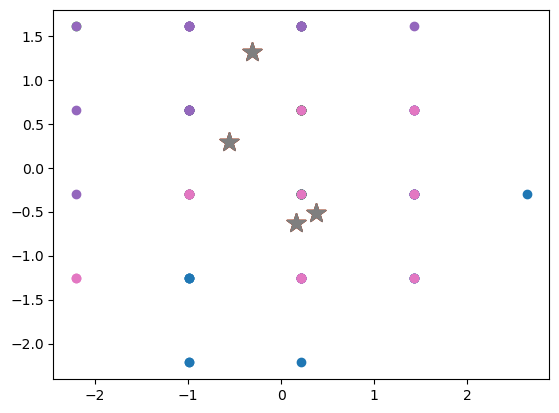

In [24]:
k = 4
for i in range (k):
    cluster_i = np.where(cluster==i)
    plt.scatter(X_std[cluster_i,0], X_std[cluster_i,1])
    plt.scatter(centroids[:,0],centroids[:,-1], marker='*', s=200)
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_std, cluster) #X_std son los datos y 'cluster' la asignación
print('\n Medida de silueta:', score)


 Medida de silueta: 0.1846944132253971


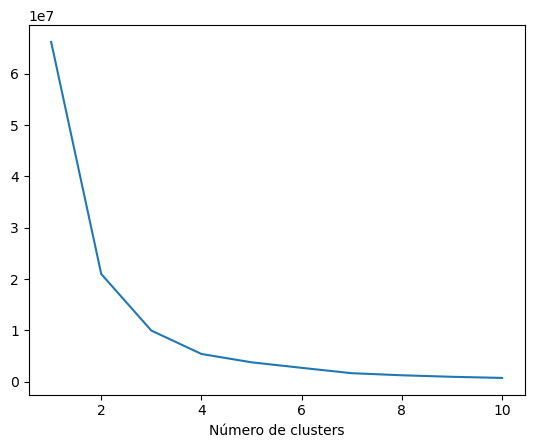

In [26]:
wss = [] #wss, del inglés Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# Crear gráfico
plt.plot(range(1, 11), wss)
plt.xlabel('Número de clusters')
plt.show()

In [27]:
df['Segmento'] = cluster
df

,tiempo,ofertas,exclusivo,novedad,conocimiento,ingreso,Segmento
0,3,3,4,3,4,2884,1
1,3,3,5,4,3,2893,1
2,2,2,3,4,5,3668,1
3,4,3,4,5,4,796,0
4,3,1,4,5,4,2980,1
...,...,...,...,...,...,...,...
111,4,5,2,5,3,1519,0
112,2,3,3,3,5,880,3
113,2,5,4,4,3,1292,1
114,2,5,2,4,4,1877,0
